<a href="https://colab.research.google.com/github/gaboojie/project_gss/blob/main/GSS_Project1_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read in cleaned data:

In [76]:
import pandas as pd

url = 'https://raw.githubusercontent.com/gaboojie/project_gss/main/cleaned_gss_data.csv'
df = pd.read_csv(url)

Plot visualizations

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Must run this code snippet before graphing any plot (below)

<Axes: >

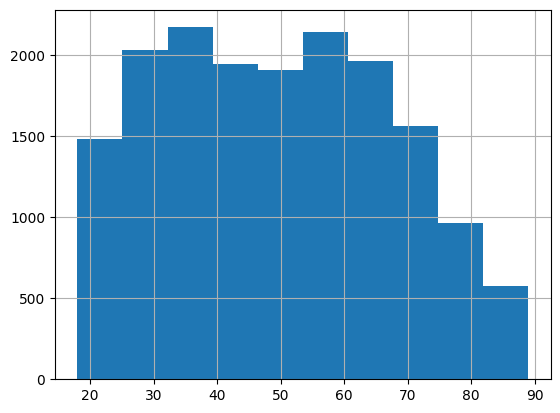

In [58]:
# looking at distribution of ages surveyed
df['age'].hist(bins=10)

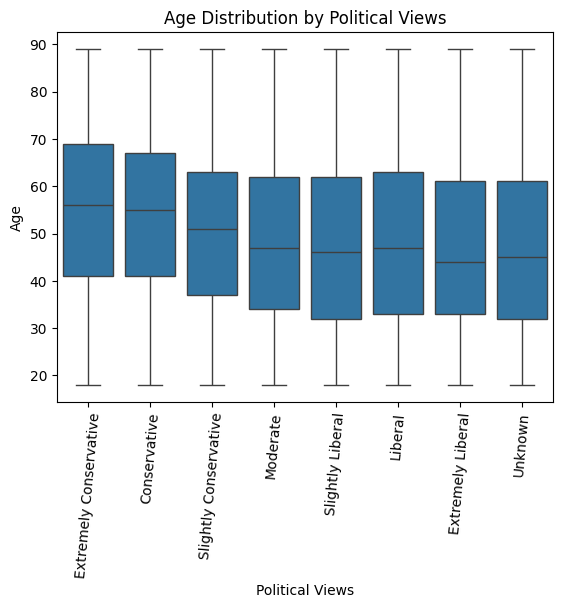

In [59]:
#boxplot of age against political views
political_order = ['Extremely Conservative', 'Conservative', 'Slightly Conservative', 'Moderate', 'Slightly Liberal', 'Liberal', 'Extremely Liberal', 'Unknown']
sns.boxplot(x='political_view', y='age', data=df, order=political_order)
plt.title("Age Distribution by Political Views")
plt.suptitle("") #gets rid of unneeded title
plt.xlabel("Political Views")
plt.ylabel("Age")
plt.xticks(rotation=85)
plt.show()

<Axes: xlabel='age', ylabel='Density'>

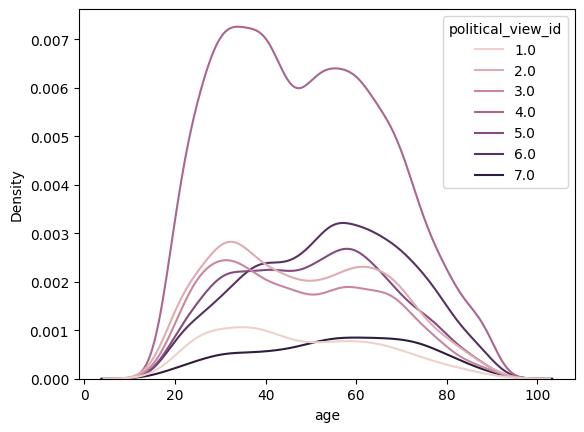

In [60]:
# depicts a strong neutral political view for middle-ages
sns.kdeplot(data=df,x='age', hue='political_view_id')

<Axes: xlabel='education', ylabel='Density'>

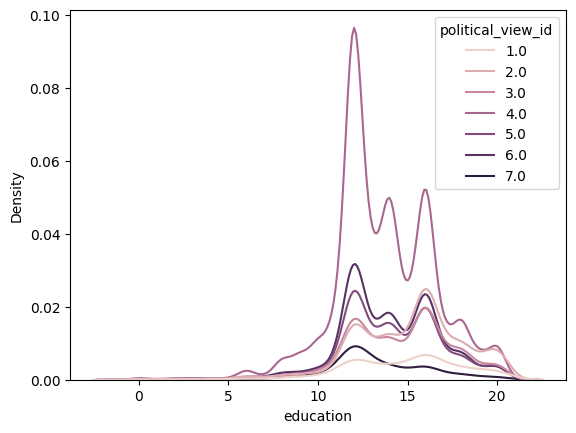

In [61]:
sns.kdeplot(data=df,x='education', hue='political_view_id')

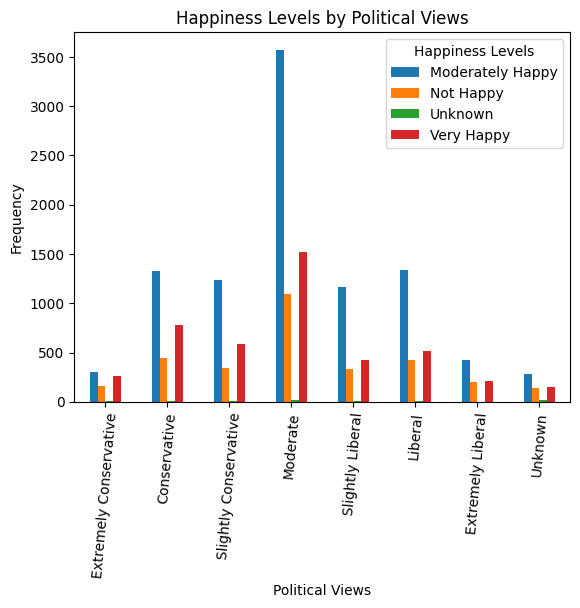

In [62]:
#plot a clustered barplot counting frequencies of happiness per political view
political_order = ['Extremely Conservative', 'Conservative', 'Slightly Conservative', 'Moderate', 'Slightly Liberal', 'Liberal', 'Extremely Liberal', 'Unknown']
df['political_view'] = pd.Categorical(df['political_view'], categories=political_order, ordered=True) #change order of political views
aggregated_data = df.groupby(['political_view', 'happy']).size().unstack(fill_value=0) #aggregate data to see count of occurences of each combination
aggregated_data.plot(kind='bar', stacked=False)
plt.title("Happiness Levels by Political Views")
plt.xlabel("Political Views")
plt.ylabel("Frequency")
plt.xticks(rotation=85)
plt.legend(title="Happiness Levels")
plt.show()

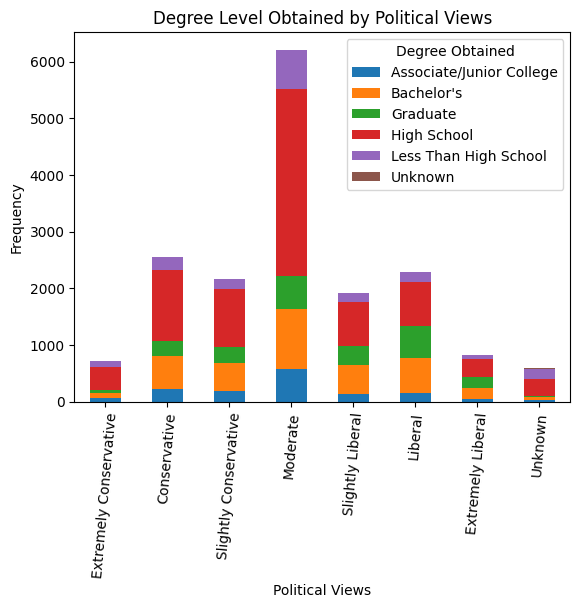

In [63]:
#plot a stacked barplot of degree levels per each political view
political_order = ['Extremely Conservative', 'Conservative', 'Slightly Conservative', 'Moderate', 'Slightly Liberal', 'Liberal', 'Extremely Liberal', 'Unknown']
df['political_view'] = pd.Categorical(df['political_view'], categories=political_order, ordered=True) #change order of political views
aggregated_data = df.groupby(['political_view', 'degree_obtained']).size().unstack(fill_value=0) #aggregate data to see count of occurences of each combination
aggregated_data.plot(kind='bar', stacked=True)
plt.title("Degree Level Obtained by Political Views")
plt.xlabel("Political Views")
plt.ylabel("Frequency")
plt.xticks(rotation=85)
plt.legend(title="Degree Obtained")
plt.show()

Looking at relationships with age and happiness before visualizing with political affiliation:

In [64]:
pd.crosstab(df['age'], df['happy'])

happy,Moderately Happy,Not Happy,Unknown,Very Happy
age,,,,
18.0,47,16,0,10
19.0,84,28,1,34
20.0,100,27,1,24
21.0,102,37,0,46
22.0,133,47,0,40
...,...,...,...,...
85.0,31,11,0,16
86.0,30,12,0,28
87.0,22,11,0,9


<Axes: xlabel='age', ylabel='Count'>

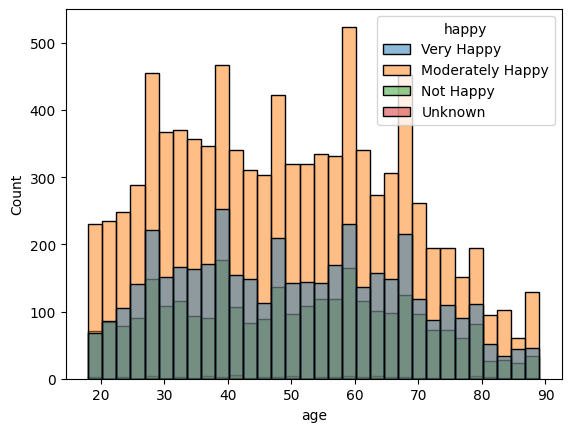

In [65]:
sns.histplot(data=df, x='age', hue='happy')

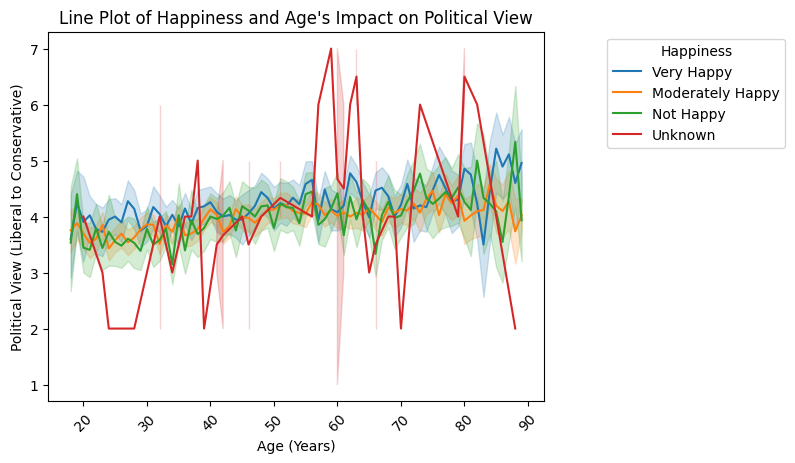

In [66]:
#
# Plot of age and happiness (Independent Variables) vs political view (Dependent Variables)
#
curr_plot = sns.lineplot(data=df, x="age", y="political_view_id", hue="happy")

curr_plot.tick_params(axis='x', rotation=45)
curr_plot.set(xlabel='Age (Years)', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Happiness and Age's Impact on Political View")
curr_plot.legend(title='Happiness')
sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))

Looking at the relationship between (years of) education with political views

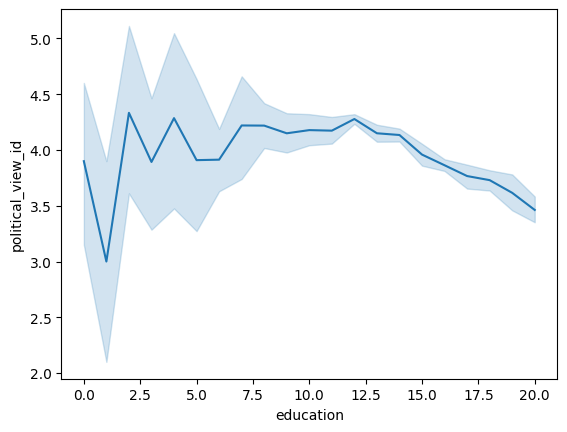

In [67]:
base=sns.lineplot(data=df, x='education', y='political_view_id')

Analyzing the relationship between years of education and age

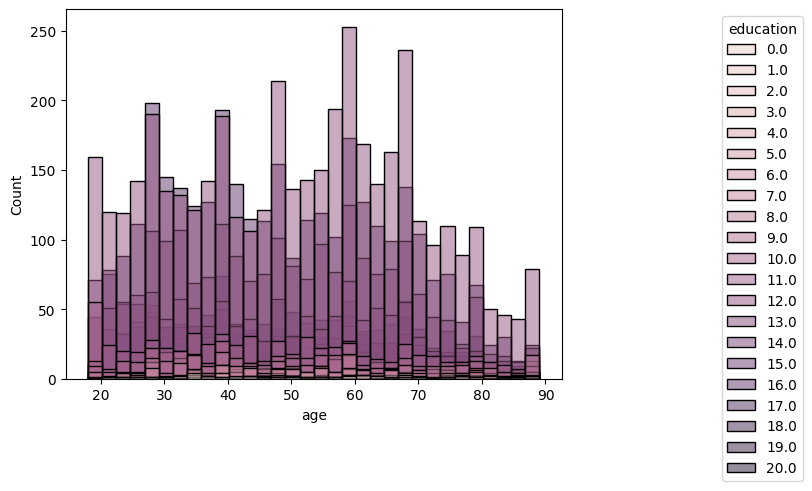

In [68]:
base=sns.histplot(data=df, x='age', hue='education')
sns.move_legend(base, "upper right", bbox_to_anchor=(1.5, 1))

<Axes: xlabel='age', ylabel='Count'>

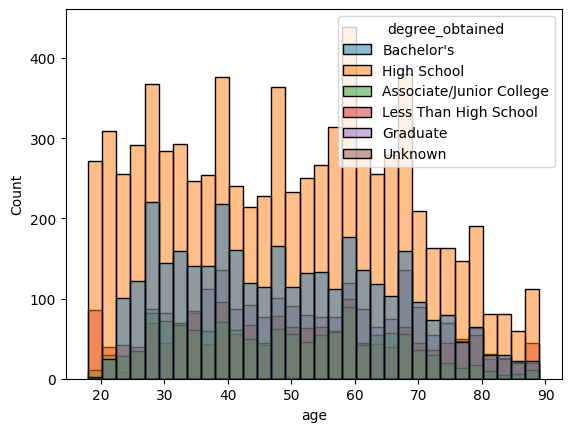

In [69]:
sns.histplot(data=df, x='age', hue='degree_obtained')

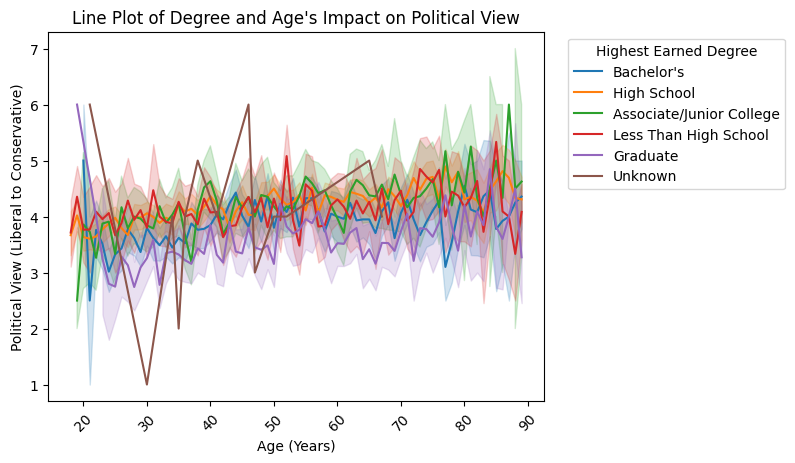

In [70]:
#
# Plot of degree and age (Independent Variables) vs political view (Dependent Variables)
#
curr_plot = sns.lineplot(data=df, x="age", y="political_view_id", hue="degree_obtained")

curr_plot.tick_params(axis='x', rotation=45)
curr_plot.set(xlabel='Age (Years)', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Degree and Age's Impact on Political View")
curr_plot.legend(title='Highest Earned Degree')
sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))

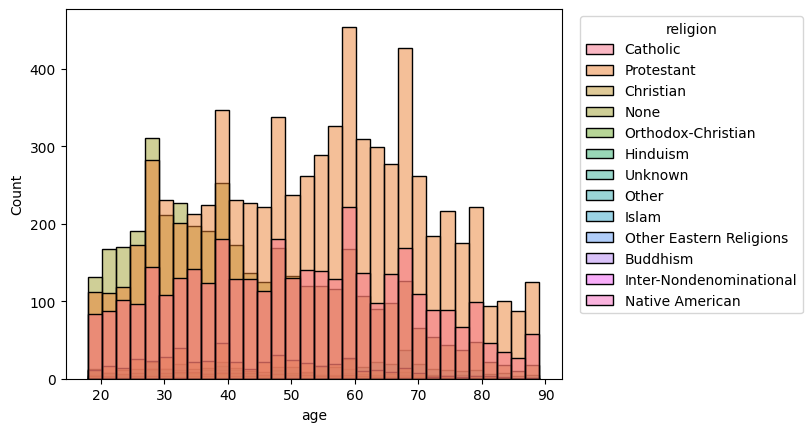

In [71]:
base=sns.histplot(data=df, hue='religion', x='age')
sns.move_legend(base, "upper right", bbox_to_anchor=(1.5, 1))
# base.set_xticklabels(base.get_xticklabels(), rotation=45)

<ipython-input-72-a0869eb4c006>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  base.set_xticklabels(base.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0.5, 0, 'Religion'),
 Text(0.5, 1.0, "Histogram of Population's Religions as Categorized by Political View")]

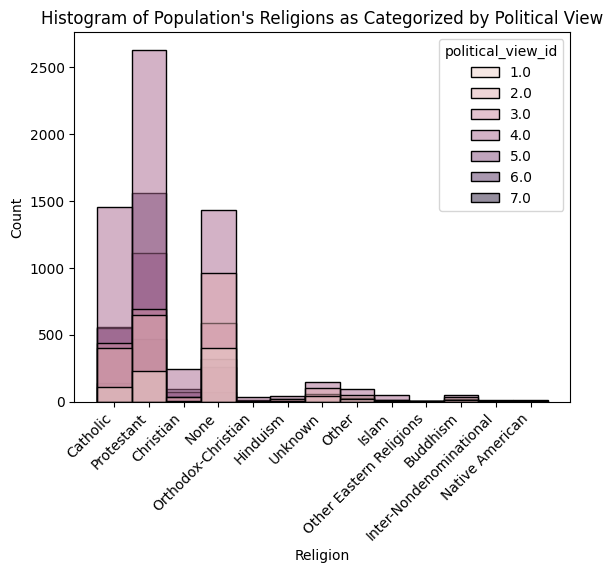

In [72]:
# harder to look at due to scale and coloring
base = sns.histplot(data=df, x='religion', hue='political_view_id')
base.set_xticklabels(base.get_xticklabels(), rotation=45, horizontalalignment='right')
base.set(xlabel='Religion', title='Histogram of Population\'s Religions as Categorized by Political View')

[Text(0.5, 0, 'Religion'),
 Text(0, 0.5, 'Political View (Liberal to Conservative)'),
 Text(0.5, 1.0, "Line Plot of Religion's Impact on Political View")]

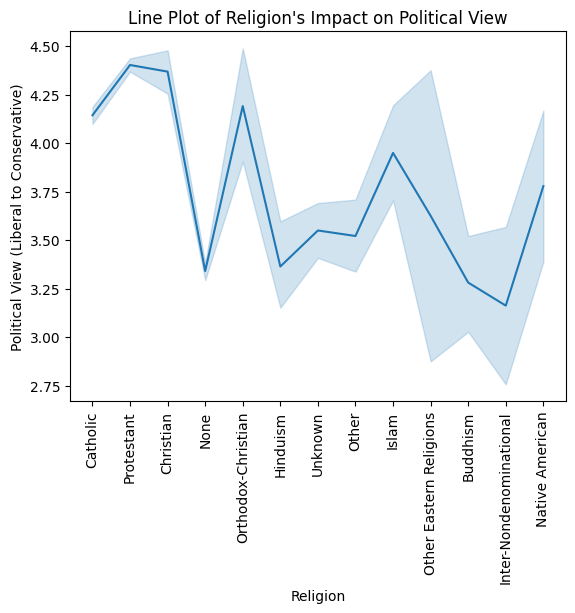

In [73]:
# curr_plot = sns.lineplot(data=df, x="age", hue="religion", y="political_view_id")
curr_plot = sns.lineplot(data=df, x="religion", y="political_view_id")

curr_plot.tick_params(axis='x', rotation=90)
curr_plot.set(xlabel='Religion', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Religion's Impact on Political View")
# curr_plot.legend(title='Religion')
# sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))